# Shell Commands

Any line in a code cell that you begin with an exclamation mark will be executed as a shell command. This can be useful when dealing with datasets or other files, and managing your Python packages. As a simple illustration:

In [1]:
!echo Hello World!
!pip freeze | grep pandas

Hello World!
geopandas==0.4.1
pandas==0.24.2


It is also possible to use Python variables in your shell commands by prepending a $ symbol consistent with bash style variable names.

In [2]:
message = 'This is nifty'
!echo $message

This is nifty


# Basic Magics

There are two categories of magic: line magics and cell magics. Respectively, they act on a single line or can be spread across multiple lines or entire cells. To see the available magics, you can do the following:

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

```
Available cell magics:%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3  %%ruby  %%script  %%sh  %%svg  %%sx  %%system  %%time  %%timeit  %%writefile

Automagic is ON, % prefix IS NOT needed for line magics.
```

As you can see, there are loads! Most are listed in the [official documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html), which is intended as a reference but can be somewhat obtuse in places. Line magics start with a percent character %, and cell magics start with two, %%.

# Autosaving

First up, the %autosave magic let’s you change how often your notebook will autosave to its checkpoint file.

In [4]:
# %autosave 60

# Displaying Matplotlib Plots

One of the most common line magics for data scientists is surely %matplotlib, which is of course for use with the most popular plotting libary for Python, Matplotlib.

In [ ]:
%matplotlib inline

Providing the inline argument instructs IPython to show Matplotlib plot images inline, within your cell outputs, enabling you to include charts inside your notebooks. Be sure to include this magic before you import Matplotlib, as it may not work if you do not; many import it at the start of their notebook, in the first code cell.

# Enhancing Charts with Seaborn

One of the most common exercises Jupyter Notebook users undertake is producing plots. But Matplotlib, Python’s most popular charting library, isn’t renowned for attractive results despite it’s customisability. Seaborn instantly prettifies Matplotlib plots and even adds some additional features pertinent to data science, making your reports prettier and your job easier. It’s included in the default Anaconda installation or easily installed via `pip install seaborn`.

Let’s check out an example. First, we’ll import our libraries and load some data.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
data = sns.load_dataset("tips")  # ./seaborn-data/tips.csv

Seaborn provides some built-in sample datasets for documentation, testing and learning purposes, which we will make use of here. This “tips” dataset is a pandas `DataFrame` listing some billing information from a bar or restaurant. We can see the size of the total bill, the tip, the gender of the payer, and some other attributes.

In [13]:
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

We can easily plot total_bill vs tip in Matplotlib.

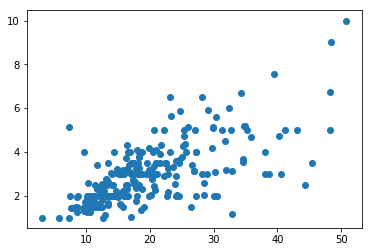

In [14]:
plt.scatter(data.total_bill, data.tip);

Plotting in Seaborn is just as easy! Simply set a style and your Matplotlib plots will automatically be transformed.

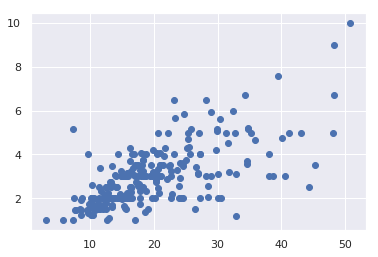

In [15]:
sns.set(style="darkgrid")
plt.scatter(data.total_bill, data.tip);

What an improvement, and from only one import and a single extra line! Here, we used the darkgrid style, but Seaborn has a total of five built-in styles for you to play with: darkgrid, whitegrid, dark, white, and ticks.

But we don’t have to stop with styling: as Seaborn is closely integrated with pandas data structures, its own scatter plot function unlocks additional features.

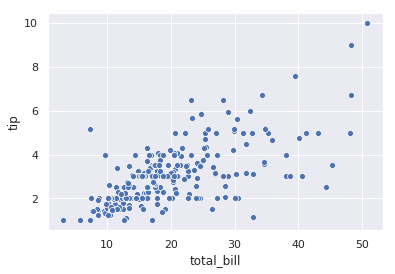

In [16]:
sns.scatterplot(x="total_bill", y="tip", data=data);

Now we get default axis labels and an improved default marker for each data point. Seaborn can also automatically group by categories within your data to add another dimension to your plots. Let’s change the colour of our markers based on whether the group paying the bill were smokers or not.

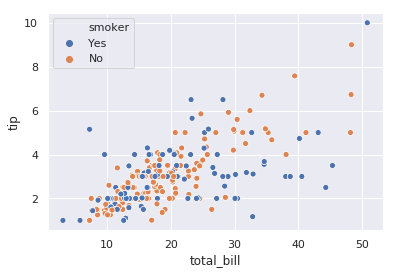

In [17]:
sns.scatterplot(x="total_bill", y="tip", hue="smoker", data=data);

That’s pretty neat! In fact, we can take this much further, but there’s simply too much detail to go into here. As a taster though, let’s colour by the size of the party paying the bill while also discriminating between smokers and non-smokers.

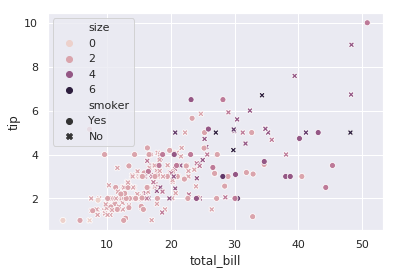

In [18]:
sns.scatterplot(x="total_bill", y="tip", hue="size", style="smoker", data=data);

Indeed, it’s high-level enough to, for example, provide one-liners for [plotting data with a line of best fit](https://seaborn.pydata.org/tutorial/regression.html) (determined through linear regression), whereas Matplotlib relies on you to prepare the data yourself. But if all you need is more attractive plots, it’s remarkably customisable; for example, if you aren’t happy with the default themes, you can choose from a whole array of standard [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) or define your own.

For more ways Seaborn allows you to visualise the structure of your data and the statistical relationships within it, check out [their examples](https://seaborn.pydata.org/examples/index.html).

# Debugging

The more experienced reader may have had concerns over the ultimate efficacy of Jupyter Notebooks without access to a debugger. But fear not! The IPython kernel has its own interface to the Python debugger, pdb, and several options for debugging with it in your notebooks. Executing the %pdb line magic will toggle on/off the automatic triggering of pdb on error across all cells in your notebook.

In [ ]:
%pdb
# raise NotImplementedError()   # uncomment to test

This exposes an interactive mode in which you can use the [pdb commands](https://docs.python.org/3/library/pdb.html#debugger-commands).

Another handy debugging magic is `%debug`, which you can execute after an exception has been raised to delve back into the call stack at the time of failure.

As an aside, also note how the traceback above demonstrates how magics are translated directly into Python commands, where `%pdb` became get_ipython().run_line_magic('pdb', ''). Executing this instead is identical to executing `%pdb`.

# Executing Different Languages

In the output of `%lsmagic` above, you may have noticed a number of cell magics named after various programming, scripting or markup langauges, including *HTML*, *JavaScript*, *Ruby*, and *LaTeX*. Using these will execute the cell using the specified language. There are also extensions available for other languages such as R.

For example, to render HTML in your notebook:

In [ ]:
%%HTML
This is <em>really</em> neat!

Similarly, LaTeX is a markup language for displaying mathematical expressions, and can be used directly:

In [ ]:
%%latex
Some important equations: $E = mc^2$, $e^{i pi} = -1$

In [ ]:
%%latex
\begin{equation}
E = mc^2
\end{equation}

or even inside a markdown cell:
\begin{equation}
E=mc^2
\end{equation}

# Configuring Logging

Did you know that Jupyter has a built-in way to prominently display custom error messages above cell output? This can be handy for ensuring that errors and warnings about things like invalid inputs or parameterisations are hard to miss for anyone who might be using your notebooks. An easy, customisable way to hook into this is via the standard Python logging module.

In [ ]:
import logging
logging.error('Some error message...')

The logging output is displayed separately from print statements or standard cell output, appearing above all of this.

In [ ]:
print('something printed')
logging.error('ooops!')
logging.warning('be careful...')
'some random output'

This actually works because Jupyter notebooks listen to both standard [output streams](https://en.wikipedia.org/wiki/Standard_streams), `stdout` and `stderr`, but handle each differently; print statements and cell output route to `stdout` and by default logging has been configured to `stream` over `stderr`.

This means we can configure logging to display other kinds of messages over `stderr` too.

In [ ]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.info('howdie')
logger.debug('I\'m getting verbose')

We can customise the format of these messages like so:

In [ ]:
logger = logging.getLogger()
handler = logging.StreamHandler()
handler.setLevel(logging.DEBUG)

formatter = logging.Formatter('%(levelname)s: %(message)s')
handler.setFormatter(formatter)

# override the default handler
logger.handlers = [handler]

# new format is used
logging.error('An error')
logging.warning('A warning')
logging.info('An info')

Note that every time you run a cell that adds a new stream handler via `logger.addHandler(handler)`, you will receive an additional line of output each time for each message logged. We could place all the logging config in its own cell near the top of our notebook and leave it be or, as we have done here, brute force replace all existing handlers on the logger. We had to do that in this case anyway to remove the default handler.

It’s also easy to [log to an external file](https://stackoverflow.com/a/28195348/604687), which might come in handy if you’re executing your notebooks from the command line as discussed later. Just use a `FileHandler` instead of a `StreamHandler`:

In [ ]:
handler = logging.FileHandler(filename='important_log.log', mode='a')

A final thing to note is that the logging described here is not to be confused with using the `%config` magic to change the application’s logging level via `%config Application.log_level="INFO"`, as this determines what Jupyter outputs to the terminal while it runs.

# Credits

Most of the stuff in this cheatsheet is taken from https://www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial/